<a href="https://colab.research.google.com/github/amirrhseiin/Crime_Reports_Statistical_Analysis/blob/main/crime_reports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from datetime import datetime
import numpy as np
from scipy.stats import chi2_contingency

In [ ]:
dataset_2019 = pd.read_csv("/content/drive/My Drive/Crime_Data_2019.csv")
dataset_2018 = pd.read_csv("/content/drive/My Drive/Crime_Data_2018 .csv")
dataset_2017 = pd.read_csv("/content/drive/My Drive/Crime_Data_2017.csv")
dataset_2016 = pd.read_csv("/content/drive/My Drive/Crime_Data_2016.csv")
dataset_2015 = pd.read_csv("/content/drive/My Drive/Crime_Data_2015.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
All_data = pd.concat([dataset_2019, dataset_2018, dataset_2017, dataset_2016, dataset_2015])
All_data = All_data.dropna(axis=0, subset=['UCR_HIERARCHY', 'ZIP_CODE', 'ATT_COMP', 'LMPD_BEAT', 'PREMISE_TYPE', 'DATE_OCCURED','CITY'])

In [ ]:
All_data.isnull().sum()

INCIDENT_NUMBER    0
DATE_REPORTED      0
DATE_OCCURED       0
UOR_DESC           0
CRIME_TYPE         0
NIBRS_CODE         0
UCR_HIERARCHY      0
ATT_COMP           0
LMPD_DIVISION      0
LMPD_BEAT          0
PREMISE_TYPE       0
BLOCK_ADDRESS      0
CITY               0
ZIP_CODE           0
ID                 0
dtype: int64

In [ ]:
def parsing_date(text):
    for formats in ('%Y-%m-%d %H:%M:%S', '%Y-%d-%m %H:%M:%S', '%Y/%m/%d %H:%M:%S', '%Y/%d/%m %H:%M:%S', '%Y.%m.%d %H:%M:%S', '%Y.%d.%m %H:%M:%S',
                '%Y-%m-%d %H:%M', '%Y-%d-%m %H:%M', '%Y/%m/%d %H:%M', '%Y/%d/%m %H:%M', '%Y.%m.%d %H:%M', '%Y.%d.%m %H:%M',
                '%m-%Y-%d %H:%M:%S', '%m-%d-%Y %H:%M:%S', '%m/%Y/%d %H:%M:%S', '%m/%d/%Y %H:%M:%S', '%m.%Y.%d %H:%M:%S', '%m.%d.%Y %H:%M:%S',
                '%m-%Y-%d %H:%M', '%m-%d-%Y %H:%M', '%m/%Y/%d %H:%M', '%m/%d/%Y %H:%M', '%m.%Y.%d %H:%M', '%m.%d.%Y %H:%M',
                '%d-%m-%Y %H:%M:%S', '%d-%Y-%m %H:%M:%S', '%d/%m/%Y %H:%M:%S', '%d/%Y/%m %H:%M:%S', '%d.%m.%Y %H:%M:%S', '%d.%Y.%m %H:%M:%S',
                '%d-%m-%Y %H:%M', '%d-%Y-%m %H:%M', '%d/%m/%Y %H:%M', '%d/%Y/%m %H:%M', '%d.%m.%Y %H:%M', '%d.%Y.%m %H:%M'):
        try:
            return datetime.strptime(text, formats)
        except ValueError:
            pass
    raise ValueError('invalid date format found')

occ_year = []
rep_year = []

for i in All_data['DATE_OCCURED']:
  occ_year.append(parsing_date(i).year)

All_data['YEAR_occ'] = occ_year


for i in All_data['DATE_REPORTED']:
  rep_year.append(parsing_date(i).year)

All_data['YEAR_rep'] = rep_year

In [ ]:
sample_data= All_data.sample(n=80000)

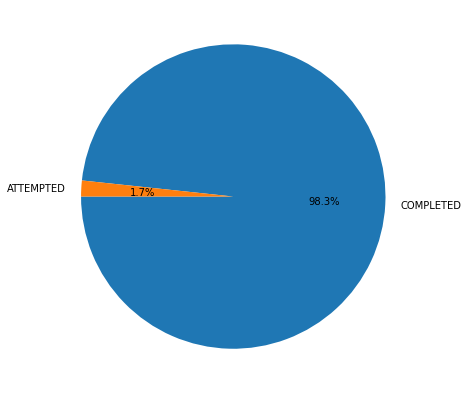

In [ ]:
plt.figure(figsize=(13,7))
g = plt.pie(sample_data.ATT_COMP.value_counts(), labels= sample_data.ATT_COMP.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

In [ ]:
cross_table = pd.crosstab(sample_data.CRIME_TYPE, sample_data.ATT_COMP, margins=True)
print(cross_table)

ATT_COMP                  ATTEMPTED  COMPLETED    All
CRIME_TYPE                                           
ARSON                             2         52     54
ASSAULT                          10      15245  15255
BURGLARY                        356       5214   5570
DISTURBING THE PEACE              1        464    465
DRUGS/ALCOHOL VIOLATIONS          0      11659  11659
DUI                               0          2      2
FRAUD                           102       4172   4274
HOMICIDE                          0        141    141
MOTOR VEHICLE THEFT              83       4220   4303
OTHER                            16       7325   7341
ROBBERY                         115       1284   1399
SEX CRIMES                       14        517    531
THEFT/LARCENY                    86      15001  15087
VANDALISM                         3       6191   6194
VEHICLE BREAK-IN/THEFT          561       5838   6399
WEAPONS                           0       1326   1326
All                         

In [ ]:
value = np.array([cross_table.iloc[0][0:2].values,
                  cross_table.iloc[1][0:2].values,
                  cross_table.iloc[2][0:2].values,
                  cross_table.iloc[3][0:2].values,
                  cross_table.iloc[4][0:2].values,
                  cross_table.iloc[5][0:2].values,
                  cross_table.iloc[6][0:2].values,
                  cross_table.iloc[7][0:2].values,
                  cross_table.iloc[8][0:2].values,
                  cross_table.iloc[9][0:2].values,
                  cross_table.iloc[10][0:2].values,
                  cross_table.iloc[11][0:2].values,
                  cross_table.iloc[12][0:2].values,
                  cross_table.iloc[13][0:2].values,
                  cross_table.iloc[14][0:2].values,
                  cross_table.iloc[15][0:2].values,
                  ])
chi2, p, dof, expected = chi2_contingency(value)
print(dof)
print(f'P_value:{p}')
if p < 0.05:
  print('H0 rejected, the variables have a significant relation.')
else:
  print('H0 accepted, the variables do not have a significant relation.')
print(f'expected:{expected}')

15
P_value:0.0
H0 rejected, the variables have a significant relation.
expected:[[9.10575000e-01 5.30894250e+01]
 [2.57237437e+02 1.49977626e+04]
 [9.39241250e+01 5.47607588e+03]
 [7.84106250e+00 4.57158937e+02]
 [1.96599887e+02 1.14624001e+04]
 [3.37250000e-02 1.96627500e+00]
 [7.20703250e+01 4.20192968e+03]
 [2.37761250e+00 1.38622388e+02]
 [7.25593375e+01 4.23044066e+03]
 [1.23787612e+02 7.21721239e+03]
 [2.35906375e+01 1.37540936e+03]
 [8.95398750e+00 5.22046012e+02]
 [2.54404538e+02 1.48325955e+04]
 [1.04446325e+02 6.08955368e+03]
 [1.07903137e+02 6.29109686e+03]
 [2.23596750e+01 1.30364033e+03]]


In [ ]:
cross_table_2 = pd.crosstab(sample_data.CRIME_TYPE, sample_data.CITY, margins=True)

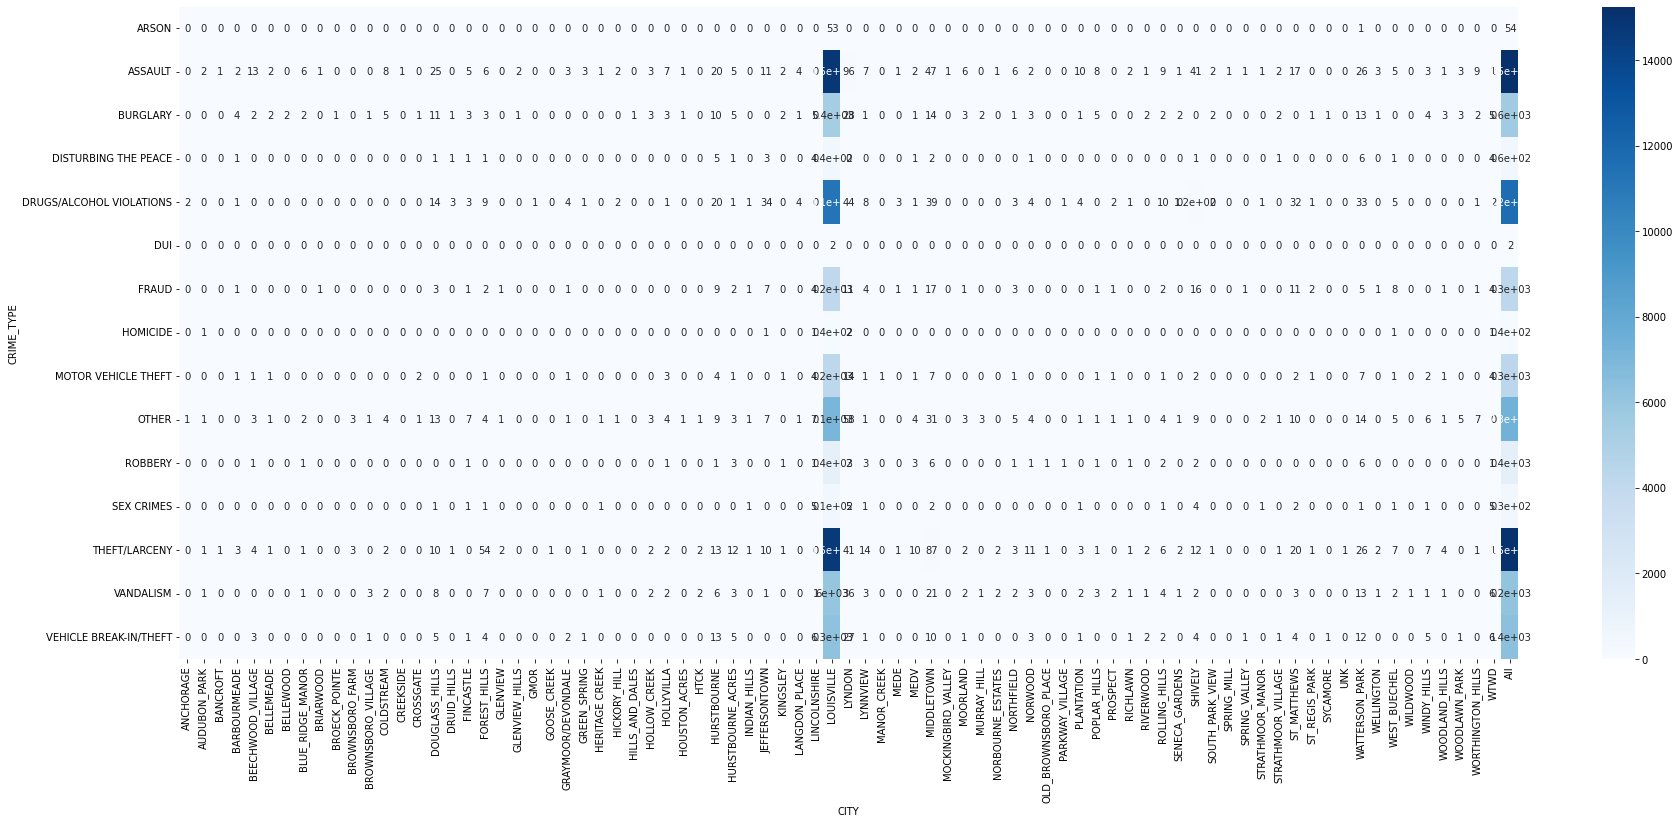

In [ ]:
fig = plt.figure(figsize=(30,12))
sns.heatmap(cross_table_2[0:15], annot=True, cmap='Blues')
plt.show()

In [ ]:
value_2 = np.array([cross_table_2.iloc[0][0:58].values,
                  cross_table_2.iloc[1][0:58].values,
                  cross_table_2.iloc[2][0:58].values,
                  cross_table_2.iloc[3][0:58].values,
                  cross_table_2.iloc[4][0:58].values,
                  cross_table_2.iloc[5][0:58].values,
                  cross_table_2.iloc[6][0:58].values,
                  cross_table_2.iloc[7][0:58].values,
                  cross_table_2.iloc[8][0:58].values,
                  cross_table_2.iloc[9][0:58].values,
                  cross_table_2.iloc[10][0:58].values,
                  cross_table_2.iloc[11][0:58].values,
                  cross_table_2.iloc[12][0:58].values,
                  cross_table_2.iloc[13][0:58].values,
                  cross_table_2.iloc[14][0:58].values,
                  cross_table_2.iloc[15][0:58].values,
                  ])
chi2, p, dof, expected = chi2_contingency(value_2)
print(f'P_value:{p}')
if p < 0.05:
  print('H0 rejected, the variables have a significant relation.')
else:
  print('H0 accepted, the variables do not have a significant relation.')

P_value:2.2387031300431568e-20
H0 rejected, the variables have a significant relation.


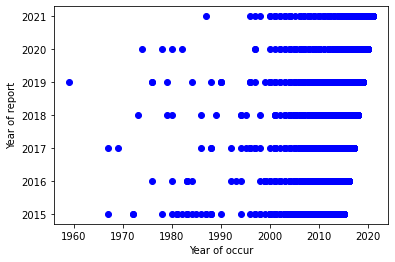

In [ ]:
plt.xlabel('Year of occur')
plt.ylabel('Year of report')
plt.plot(np.array(All_data.YEAR_occ), np.array(All_data.YEAR_rep), "bo")

In [ ]:
All_data.YEAR_occ.describe()

count    513261.000000
mean       2017.746310
std           2.030659
min        1959.000000
25%        2016.000000
50%        2018.000000
75%        2019.000000
max        2021.000000
Name: YEAR_occ, dtype: float64

In [ ]:
oldest_crimes = All_data[All_data['YEAR_occ']< 1975]
oldest_crimes = oldest_crimes.drop(['INCIDENT_NUMBER','UOR_DESC', 'NIBRS_CODE', 'UCR_HIERARCHY',
                                    'ATT_COMP', 'LMPD_DIVISION', 'LMPD_BEAT', 'BLOCK_ADDRESS', 'ZIP_CODE', 'ID'], axis=1)
oldest_crimes

,DATE_REPORTED,DATE_OCCURED,CRIME_TYPE,PREMISE_TYPE,CITY,YEAR_occ,YEAR_rep
92338,2019-11-01 13:09:00,1959-06-13 08:00:00,SEX CRIMES,HIGHWAY / ROAD / ALLEY,LOUISVILLE,1959,2019
119203,2020-02-05 06:14:14,1974-01-01 00:01:00,FRAUD,RESIDENCE / HOME,LOUISVILLE,1974,2020
51834,10/23/2018 14:28,6/1/1973 17:00,SEX CRIMES,GOVERNMENT / PUBLIC BUILDING,LOUISVILLE,1973,2018
6333,2017-02-28 12:57:00,1967-01-01 12:57:00,SEX CRIMES,RESIDENCE / HOME,LOUISVILLE,1967,2017
52670,2017-12-22 13:18:00,1969-05-12 12:00:00,SEX CRIMES,RESIDENCE / HOME,LOUISVILLE,1969,2017
52383,2015-09-09 10:30:00,1972-01-01 00:00:00,SEX CRIMES,RESIDENCE / HOME,LOUISVILLE,1972,2015
53486,2015-09-08 14:18:00,1972-12-09 00:00:00,SEX CRIMES,OTHER / UNKNOWN,LOUISVILLE,1972,2015
76136,2015-12-11 10:47:00,1967-10-30 12:00:00,SEX CRIMES,RESIDENCE / HOME,LOUISVILLE,1967,2015


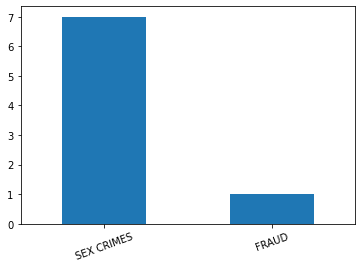

In [ ]:
oldest_crimes.CRIME_TYPE.value_counts().plot.bar(x="neighbourhood", y="mean", rot=20)

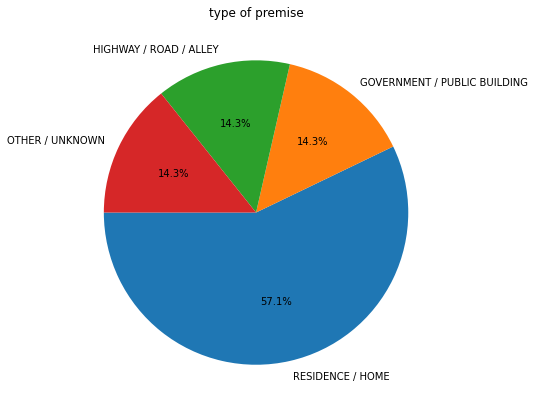

In [ ]:
oldest_sex_crimes = oldest_crimes[oldest_crimes['CRIME_TYPE']== 'SEX CRIMES']
plt.figure(figsize=(13,7))
plt.title("type of premise")
g = plt.pie(oldest_sex_crimes.PREMISE_TYPE.value_counts(), labels= oldest_sex_crimes.PREMISE_TYPE.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

In [ ]:
seven_years_data = All_data[All_data['YEAR_occ']>2014]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


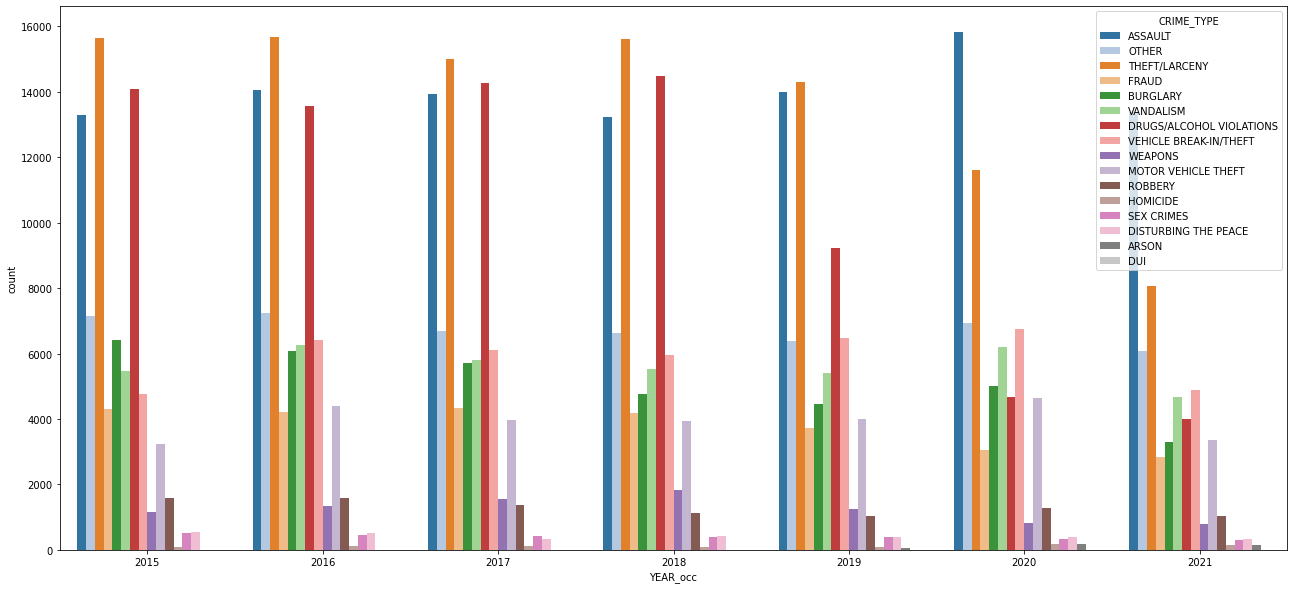

In [ ]:
plt.figure(figsize=(22,10))
#plt.title("")
sns.countplot(seven_years_data.YEAR_occ, hue=seven_years_data.CRIME_TYPE, palette="tab20")
plt.show()

In [ ]:
first_part = ['SEX CRIMES', 'ARSON', 'DUI','MOTOR VEHICLE THEFT', 'HOMICIDE', 'DISTURBING THE PEACE', 'WEAPONS', 'ROBBERY']
crime_1 = seven_years_data[seven_years_data['CRIME_TYPE'].isin(first_part)]

second_part = ['THEFT/LARCENY', 'ASSAULT', 'OTHER', 'VEHICLE BREAK-IN/THEFT', 'DRUGS/ALCOHOL VIOLATIONS', 'VANDALISM', 'BURGLARY','FRAUD']
crime_2 = seven_years_data[seven_years_data['CRIME_TYPE'].isin(second_part)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


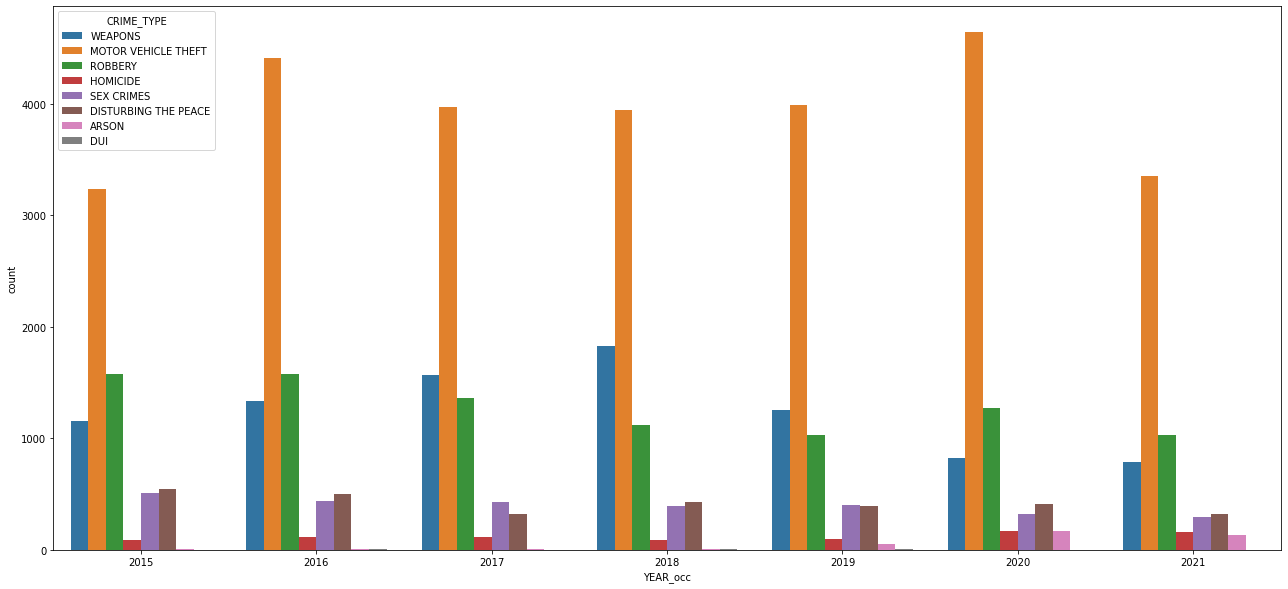

In [ ]:
plt.figure(figsize=(22,10))
#plt.title("")
sns.countplot(crime_1.YEAR_occ, hue=crime_1.CRIME_TYPE, palette=sns.color_palette())
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


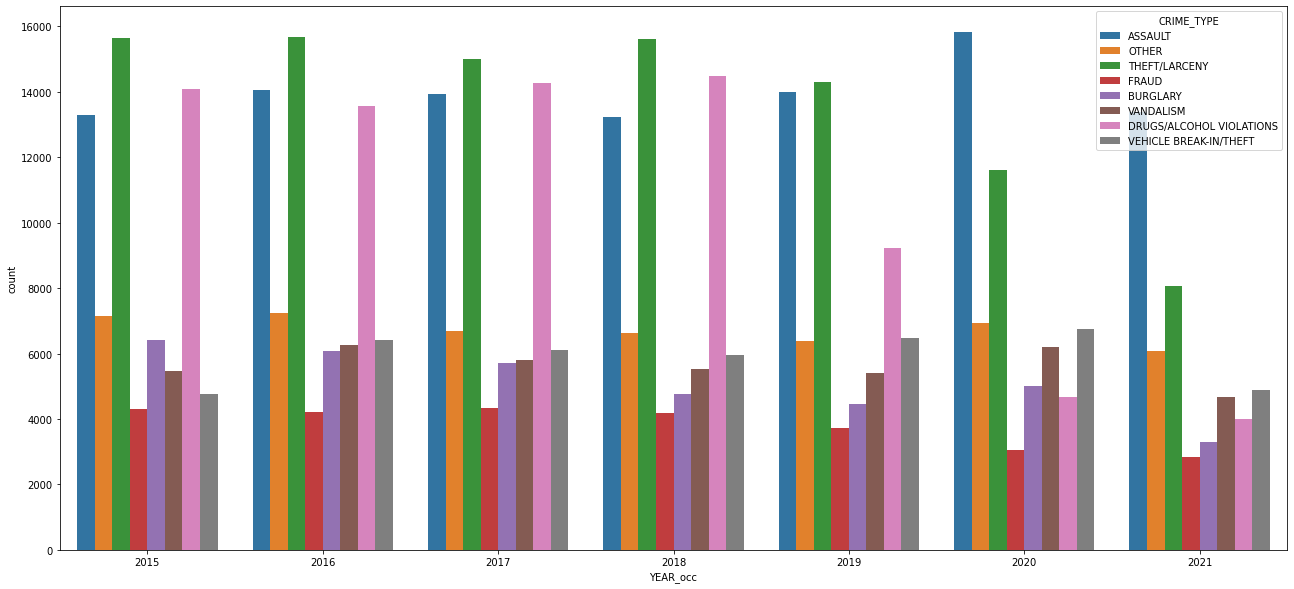

In [ ]:
plt.figure(figsize=(22,10))
#plt.title("")
sns.countplot(crime_2.YEAR_occ, hue= crime_2.CRIME_TYPE, palette=sns.color_palette())
plt.show()

In [ ]:
sample_data.CRIME_TYPE.unique

<bound method Series.unique of 154077                   VANDALISM
54528                     BURGLARY
25784                      ASSAULT
19486                      ASSAULT
196737                    BURGLARY
                    ...           
68837                THEFT/LARCENY
38150     DRUGS/ALCOHOL VIOLATIONS
86506     DRUGS/ALCOHOL VIOLATIONS
65275                THEFT/LARCENY
10176                      ASSAULT
Name: CRIME_TYPE, Length: 80000, dtype: object>